In [17]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [44]:
model_name = 'VGG16'
dataset_name = 'CIFAR10'
init_param_path = '../src/checkpoints/init_param_' + model_name + '_' + dataset_name + '.pth'
final_param_path = '../src/checkpoints/final_param_' + model_name + '_' + dataset_name + '.pth'
#init_param_path = '../src/checkpoints/LeNet5_init.pth'
#final_param_path = '../src/checkpoints/LeNet5_final.pth'
init_param_dict = torch.load(init_param_path, map_location=torch.device('cpu'))
final_param_dict = torch.load(final_param_path, map_location=torch.device('cpu'))

In [45]:
for (key,layer_weights_tensor) in init_param_dict.items():
    print(key)

conv_layers.0.weight
conv_layers.0.bias
conv_layers.1.weight
conv_layers.1.bias
conv_layers.1.running_mean
conv_layers.1.running_var
conv_layers.1.num_batches_tracked
conv_layers.3.weight
conv_layers.3.bias
conv_layers.4.weight
conv_layers.4.bias
conv_layers.4.running_mean
conv_layers.4.running_var
conv_layers.4.num_batches_tracked
conv_layers.7.weight
conv_layers.7.bias
conv_layers.8.weight
conv_layers.8.bias
conv_layers.8.running_mean
conv_layers.8.running_var
conv_layers.8.num_batches_tracked
conv_layers.10.weight
conv_layers.10.bias
conv_layers.11.weight
conv_layers.11.bias
conv_layers.11.running_mean
conv_layers.11.running_var
conv_layers.11.num_batches_tracked
conv_layers.14.weight
conv_layers.14.bias
conv_layers.15.weight
conv_layers.15.bias
conv_layers.15.running_mean
conv_layers.15.running_var
conv_layers.15.num_batches_tracked
conv_layers.17.weight
conv_layers.17.bias
conv_layers.18.weight
conv_layers.18.bias
conv_layers.18.running_mean
conv_layers.18.running_var
conv_layers.

In [46]:
init_weights_array = np.zeros(0)
for (key,layer_weights_tensor) in init_param_dict.items():
    if 'weight' in key:
        print(key)
        init_weights_array = np.append(init_weights_array, layer_weights_tensor)

final_weights_array = np.zeros(0)
for (key,layer_weights_tensor) in final_param_dict.items():
    if 'weight' in key:
        print(key)
        final_weights_array = np.append(final_weights_array, layer_weights_tensor)

conv_layers.0.weight
conv_layers.1.weight
conv_layers.3.weight
conv_layers.4.weight
conv_layers.7.weight
conv_layers.8.weight
conv_layers.10.weight
conv_layers.11.weight
conv_layers.14.weight
conv_layers.15.weight
conv_layers.17.weight
conv_layers.18.weight
conv_layers.20.weight
conv_layers.21.weight
conv_layers.24.weight
conv_layers.25.weight
conv_layers.27.weight
conv_layers.28.weight
conv_layers.30.weight
conv_layers.31.weight
conv_layers.34.weight
conv_layers.35.weight
conv_layers.37.weight
conv_layers.38.weight
conv_layers.40.weight
conv_layers.41.weight
fc_layers.0.weight
fc_layers.3.weight
fc_layers.6.weight
conv_layers.0.weight
conv_layers.1.weight
conv_layers.3.weight
conv_layers.4.weight
conv_layers.7.weight
conv_layers.8.weight
conv_layers.10.weight
conv_layers.11.weight
conv_layers.14.weight
conv_layers.15.weight
conv_layers.17.weight
conv_layers.18.weight
conv_layers.20.weight
conv_layers.21.weight
conv_layers.24.weight
conv_layers.25.weight
conv_layers.27.weight
conv_laye

In [47]:
init_weights_array.shape

(33630016,)

In [48]:
final_weights_array.shape

(33630016,)

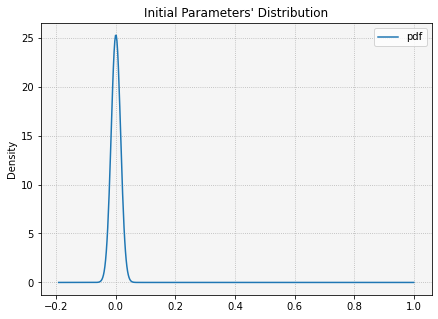

In [49]:
fig, ax = plt.subplots(figsize=(7,5),nrows=1, ncols=1)
fig.patch.set_facecolor('w')
ax.grid(linestyle='dotted')
ax.set_facecolor('whitesmoke')
ax.set_ylabel('Density')
bin_edges = np.histogram(init_weights_array,bins=500)[1]
#plt.hist(init_weights_array,bins=50, edgecolor='steelblue',density=True, stacked=True)
loc, std = stats.norm.fit(init_weights_array)
plt.plot(bin_edges,stats.norm.pdf(bin_edges, loc=loc, scale=std))
ax.legend(['pdf','normalized frequency'])
ax.title.set_text('Initial Parameters\' Distribution')
plt.show()
fig_name = 'init_weights_distribution_' + model_name + '_' + dataset_name + '.png'
fig.savefig(fig_name)

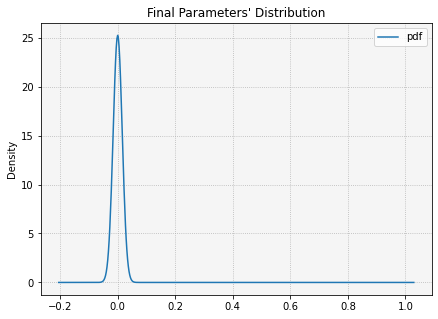

In [50]:
fig, ax = plt.subplots(figsize=(7,5),nrows=1, ncols=1)
fig.patch.set_facecolor('w')
ax.grid(linestyle='dotted')
ax.set_facecolor('whitesmoke')
ax.set_ylabel('Density')
bin_edges = np.histogram(final_weights_array,bins=500)[1]
#plt.hist(final_weights_array,bins=50, edgecolor='steelblue',density=True, stacked=True)
loc, std = stats.norm.fit(final_weights_array)
plt.plot(bin_edges,stats.norm.pdf(bin_edges, loc=loc, scale=std))
ax.legend(['pdf','normalized frequency'])
ax.title.set_text('Final Parameters\' Distribution')
plt.show()
fig_name = 'final_weights_distribution_' + model_name + '_' + dataset_name + '.png'
fig.savefig(fig_name)

-----

(array([6.19215610e-03, 4.12810407e-03, 1.03202602e-02, 2.06405203e-03,
        8.25620814e-03, 6.19215610e-03, 2.06405203e-03, 4.12810407e-03,
        8.25620814e-03, 6.19215610e-03, 1.03202602e-02, 6.19215610e-02,
        5.57294049e-02, 7.03841744e-01, 1.03615412e+00, 1.19715018e+00,
        1.13935672e+00, 1.20540639e+00, 5.07343990e+00, 8.99926687e+00,
        9.08595706e+00, 8.97037014e+00, 8.93940936e+00, 8.94972962e+00,
        8.92496100e+00, 9.22631260e+00, 9.04054791e+00, 9.05293222e+00,
        9.10040542e+00, 8.81350219e+00, 9.13755836e+00, 2.80917482e+00,
        1.21366260e+00, 1.24462338e+00, 1.16206130e+00, 1.05473059e+00,
        4.52027396e-01, 5.16013009e-02, 4.54091448e-02, 4.12810407e-03,
        4.12810407e-03, 1.23843122e-02, 6.19215610e-03, 0.00000000e+00,
        4.12810407e-03, 6.19215610e-03, 4.12810407e-03, 8.25620814e-03,
        6.19215610e-03, 6.19215610e-03]),
 array([-0.19591485, -0.18803322, -0.18015159, -0.17226995, -0.16438832,
        -0.15650669, 

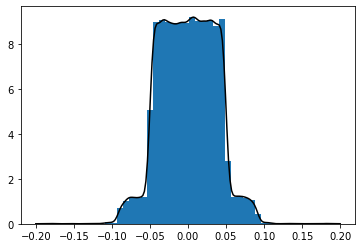

In [31]:
kde = stats.gaussian_kde(init_weights_array)
#visualize KDE
fig = plt.figure()
ax = fig.add_subplot(111)
x_eval = np.linspace(-.2, .2, num=200)
ax.plot(x_eval, kde(x_eval), 'k-')
ax.hist(init_weights_array,bins=50,density=True, stacked=True)

----

<AxesSubplot:ylabel='Density'>

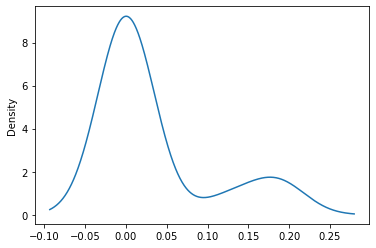

In [29]:
init_weights_bins = pd.cut(init_weights_array, 30)
#pd.value_counts(init_weights_bins)
#plt.figure(figsize=(10,10))
#plt.xlabel(init_weights_bins)
#pd.value_counts(init_weights_bins).sort_index().plot.bar()
#x = np.linspace(np.min(init_weights_array), np.max(init_weights_array), 100)
#plt.plot(x, stats.norm.pdf(x, np.mean(init_weights_array),np.std(init_weights_array)))
#pd.value_counts(init_weights_bins,normalize=True).sort_index().plot.density()
#pd.value_counts(init_weights_bins,normalize=True).sort_index().plot.bar()
pd.value_counts(init_weights_bins,normalize=True).sort_index().plot.density()
#sns.distplot(pd.value_counts(init_weights_bins),kde_kws={"bw": 0.5})
#sns.displot(pd.value_counts(init_weights_bins), kde=True)

<AxesSubplot:ylabel='Density'>

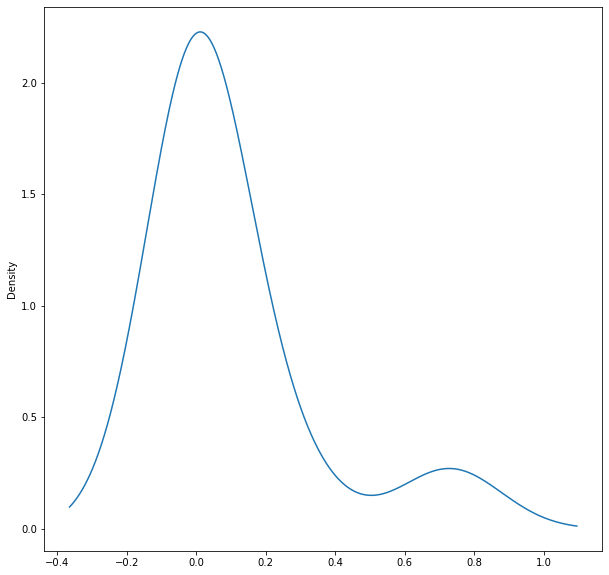

In [95]:
final_weights_bins = pd.cut(final_weights_array, 10)
plt.figure(figsize=(10,10))
#pd.value_counts(final_weights_bins).sort_index().plot.bar()
pd.value_counts(final_weights_bins,normalize=True).sort_index().plot.density()
#sns.distplot(pd.value_counts(final_weights_bins))

In [37]:
init_weights_bins = pd.cut(init_weights_array, 5)
pd.value_counts(init_weights_bins)

(-0.0397, 0.0401]    426821
(-0.12, -0.0397]       1810
(0.0401, 0.12]         1652
(0.12, 0.2]             109
(-0.2, -0.12]           108
dtype: int64

In [33]:
final_weights_bins = pd.cut(final_weights_array, 10)
pd.value_counts(final_weights_bins)

(-0.0846, 0.0268]    233165
(0.0268, 0.138]      107056
(-0.196, -0.0846]     63392
(0.138, 0.25]         16070
(-0.307, -0.196]       8916
(0.25, 0.361]           933
(-0.419, -0.307]        880
(-0.53, -0.419]          53
(0.361, 0.472]           30
(-0.643, -0.53]           5
dtype: int64

In [40]:
np.histogram(init_weights_array,bins=50)

(array([   11,    15,     5,    12,     8,     9,    11,    10,    14,
           13,    10,     8,     8,    11,     7,     9,    13,    10,
            9,  1725, 22897, 47898, 48051, 48151, 47680, 47673, 47886,
        47595, 47916, 21074,  1577,    10,     9,     5,     9,     6,
           11,     7,     6,    12,     8,    13,     8,     8,     8,
           13,    16,    11,    10,    14]),
 array([-1.99337482e-01, -1.91356806e-01, -1.83376129e-01, -1.75395453e-01,
        -1.67414776e-01, -1.59434099e-01, -1.51453423e-01, -1.43472746e-01,
        -1.35492070e-01, -1.27511393e-01, -1.19530717e-01, -1.11550040e-01,
        -1.03569363e-01, -9.55886868e-02, -8.76080102e-02, -7.96273336e-02,
        -7.16466570e-02, -6.36659804e-02, -5.56853038e-02, -4.77046272e-02,
        -3.97239506e-02, -3.17432740e-02, -2.37625974e-02, -1.57819209e-02,
        -7.80124426e-03,  1.79432333e-04,  8.16010892e-03,  1.61407855e-02,
         2.41214621e-02,  3.21021387e-02,  4.00828153e-02,  4.806349